<a href="https://colab.research.google.com/github/michalMalujdy/machine-learning-colab/blob/master/small_dataset_cats_and_dogs_feature_extraction_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.7 GB  | Proc size: 138.8 MB
GPU RAM Free: 11439MB | Used: 0MB | Util   0% | Total 11439MB


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

conv_base.trainable = False

isTrainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    isTrainable = True
    
  layer.trainable = isTrainable

model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = optimizers.RMSprop(lr=1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()


Using TensorFlow backend.


58892288/58889256 [==============================] - 3s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________




---




Images preprocessing using genrators from Kreas

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/My Drive/ML/Datasets/CatsAndDogs/train'

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (150, 150),
  batch_size = 20,
  class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [0]:
validation_dir = '/content/drive/My Drive/ML/Datasets/CatsAndDogs/validation'

validation_generator = train_datagen.flow_from_directory(
  validation_dir,
  target_size = (150, 150),
  batch_size = 20,
  class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=50)

model.save('cats_and_dogs_small_4.h5')

Epoch 1/100
100/100 [==============================] - 404s 4s/step - loss: 0.5556 - acc: 0.7585 - val_loss: 0.5219 - val_acc: 0.7680
Epoch 2/100
100/100 [==============================] - 39s 388ms/step - loss: 0.4992 - acc: 0.7800 - val_loss: 0.4916 - val_acc: 0.7830
Epoch 3/100
100/100 [==============================] - 39s 388ms/step - loss: 0.4586 - acc: 0.7975 - val_loss: 0.4507 - val_acc: 0.8070
Epoch 4/100
100/100 [==============================] - 41s 407ms/step - loss: 0.4386 - acc: 0.8030 - val_loss: 0.4377 - val_acc: 0.8210
Epoch 5/100
100/100 [==============================] - 41s 413ms/step - loss: 0.4176 - acc: 0.8230 - val_loss: 0.4119 - val_acc: 0.8200
Epoch 6/100
100/100 [==============================] - 39s 391ms/step - loss: 0.4090 - acc: 0.8175 - val_loss: 0.4074 - val_acc: 0.8020
Epoch 7/100
100/100 [==============================] - 39s 394ms/step - loss: 0.3853 - acc: 0.8345 - val_loss: 0.4021 - val_acc: 0.8150
Epoch 8/100
100/100 [=============================

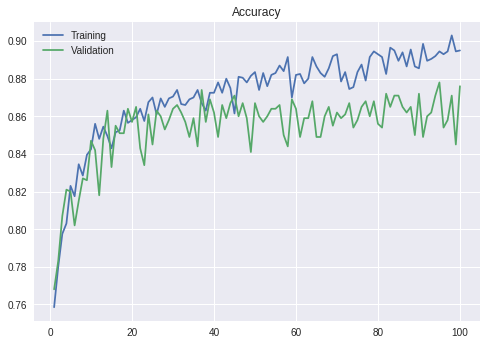

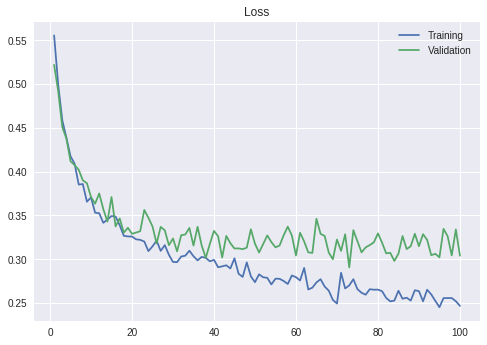

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['acc']) + 1)

plt.plot(epochs, history.history['acc'], label = 'Training')
plt.plot(epochs, history.history['val_acc'], label = 'Validation')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.figure();

plt.plot(epochs, history.history['loss'], label = 'Training')
plt.plot(epochs, history.history['val_loss'], label = 'Validation')
plt.title('Loss')
plt.legend()
plt.show()
